Based on independent features,regression helps in predicting dependent feature assuming that there is a linear relation between independent and dependent feature


# Prediction

Text(0.5, 0, 'Number of advertisements per day')

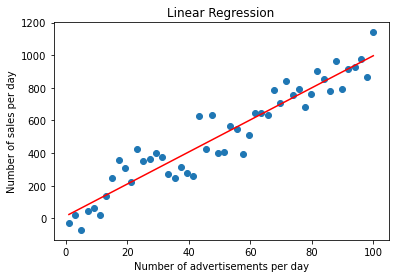

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

n = 50
x = np.linspace(1, 100, n)
y = x * 10 + np.random.randn(n)*80

fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg=1)
#fit[0] and fit[1] are beta-0 and beta-1
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.scatter(x, y)
ax.set_title('Linear Regression')
ax.set_ylabel('Number of sales per day')
ax.set_xlabel('Number of advertisements per day')

# Classification

Logistic Regression assumes a linear relationship between the variables and the log of the odds

Odds = p / 1 - p, where p is the probability of y = 1

log(odds) = β0 + β1X1 + β2X2 + ... + βnXn

([<matplotlib.axis.XTick at 0x2d5b8f018d0>,
 [Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7')])

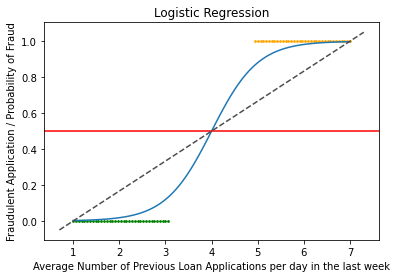

In [4]:
X = np.linspace(-6, 6, 100)
Y = 1 / (1 + np.exp(-X))

# log dots
Y_dots0 = np.array(list('0')*35).astype(int)
Y_dots1 = np.array(list('1')*35).astype(int)

#ticks
x = np.array([-6, -4, -2, 0, 2, 4, 6])
my_xticks = [1,2,3,4,5,6,7]

fig, ax = plt.subplots()
plt.plot(X, Y)
ax.scatter(X[0:35], Y_dots0, s=3, color='green')
ax.scatter(X[65:100], Y_dots1, s=3, color='orange')
plt.axhline(y=0.5, xmin=-6, xmax=6, color ='red')
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
ax.set_title('Logistic Regression')
ax.set_ylabel('Fraudulent Application / Probability of Fraud')
ax.set_xlabel('Average Number of Previous Loan Applications per day in the last week')
plt.xticks(x, my_xticks)

Observation:
To predict if a loan application is fraudulent based on the number of previous applications the customer made to different loan providers per day during the last week (fraudsters tend to make multiple applications to multiple places to maximise their chances of getting a loan).
- The yellow and green dots indicate fraudulent and non-fraudulent applications. 
- The dotted black line indicates the linear relationship assumed by the Logistic Regression model. 
- The blue line indicates the outcome of the Logistic function, or in other words, 
  the probability of an application being     fraudulent. 
  
  
   If the probability is higher than 0.5 then the application has a high probability of being fraudulent, 
   whereas 
   if the probability is smaller than 0.5 then it is very likely a genuine application.

# Example: House Price Prediction

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
cols = ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea','WoodDeckSF',
               'BsmtUnfSF','SalePrice']

data = pd.read_csv('C:\\Users\\admin\PP_programs\DataRepo\house_price.csv', usecols=cols)
print(data.shape)
data.head()

(1460, 7)


,OverallQual,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,SalePrice
0,7,150,856,856,1710,0,208500
1,6,284,1262,1262,1262,298,181500
2,7,434,920,920,1786,0,223500
3,7,540,756,961,1717,0,140000
4,8,490,1145,1145,2198,192,250000


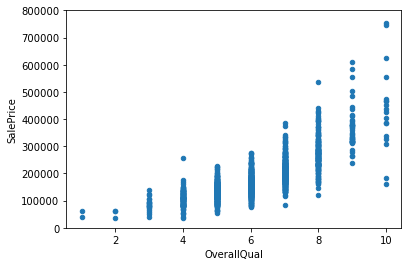

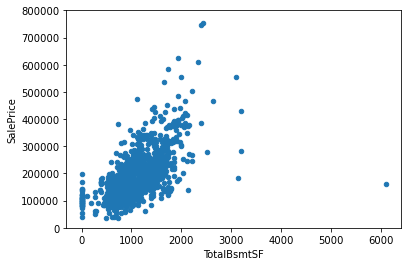

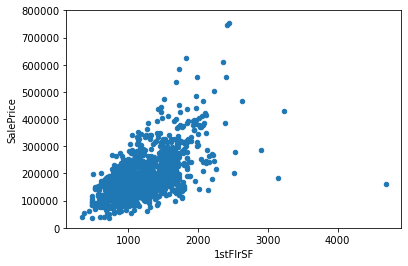

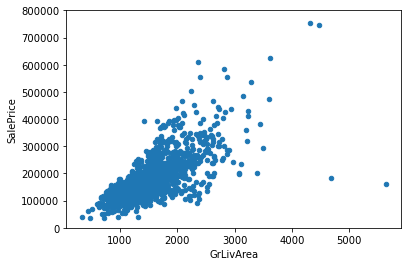

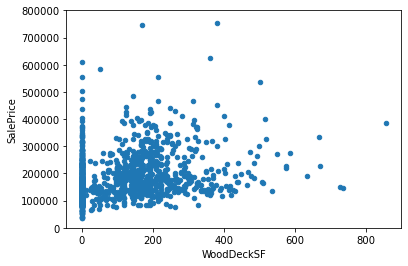

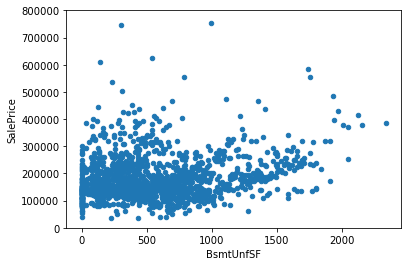

In [7]:
for col in cols[:-1]:
    data.plot.scatter(x=col, y='SalePrice', ylim=(0,800000))
    plt.show()

Observation:
    
    Linear_var:'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea'
    Non-linear:'WoodDeckSF','BsmtUnfSF'

In [8]:
linear_vars = ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea']
non_linear_vars = ['WoodDeckSF', 'BsmtUnfSF']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    data.fillna(0), data.SalePrice, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((1022, 7), (438, 7))

Check Exsistence of Linearity

1) make a linear regression model using the desired variables (X)

2) predict with the linear model the target

3) determine the error (True sale price - predicted sale price)

4) observe the distribution of the error.

# 'OverallQual'

Train: Linear Regression mse: 2349097879.282572
Test: Linear Regression mse: 2390257968.965773
Error Stats
count       438.000000
mean      -1900.505074
std       48909.175847
min     -197503.771783
25%      -27300.973002
50%       -2136.441159
75%       16082.692310
max      387496.228217
Name: error, dtype: float64


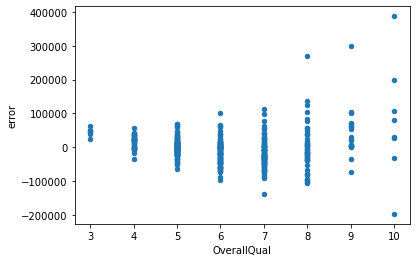

In [10]:
col = 'OverallQual'
linreg = LinearRegression()
linreg.fit(X_train[col].to_frame(), y_train)
pred = linreg.predict(X_train[col].to_frame())
print('Train: Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))
pred = linreg.predict(X_test[col].to_frame())
print('Test: Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
X_test['error'] = X_test.SalePrice - pred
print('Error Stats')
print(X_test['error'].describe())
X_test.plot.scatter(x=col, y='error')

Conclusion: 'OverallQual' is not linearly related to 'SalePrice'

# 'TotalBsmtSF'

Train: Linear Regression mse: 3715940037.8173113
Test: Linear Regression mse: 4478167557.081896
Error Stats
count       438.000000
mean        288.594287
std       66995.011776
min     -622462.817334
25%      -37885.876660
50%      -11364.807331
75%       36649.455113
max      404776.853066
Name: error, dtype: float64


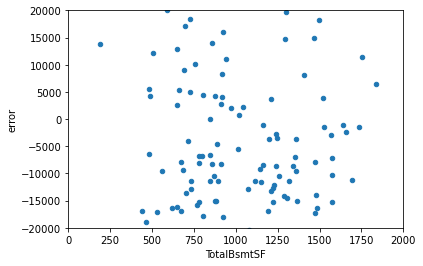

In [12]:
col = 'TotalBsmtSF'
linreg = LinearRegression()
linreg.fit(X_train[col].to_frame(), y_train)
pred = linreg.predict(X_train[col].to_frame())
print('Train: Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))
pred = linreg.predict(X_test[col].to_frame())
print('Test: Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
X_test['error'] = X_test.SalePrice - pred
print('Error Stats')
print(X_test['error'].describe())
X_test.plot.scatter(x=col, y='error',xlim=(0, 2000), ylim=(-20000, 20000))

Conclusion: 'TotalBsmtSF' is not linearly related to 'SalePrice'

# '1stFlrSF'

Train: Linear Regression mse: 3827412644.4517813
Test: Linear Regression mse: 4380212049.55635
Error Stats
count       438.000000
mean        732.027656
std       66254.798523
min     -470783.611154
25%      -34069.301831
50%      -12065.539516
75%       32568.866387
max      405100.070469
Name: error, dtype: float64


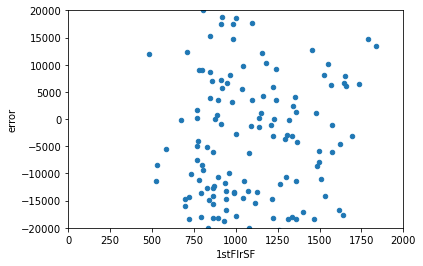

In [14]:
col = '1stFlrSF'
linreg = LinearRegression()
linreg.fit(X_train[col].to_frame(), y_train)
pred = linreg.predict(X_train[col].to_frame())
print('Train: Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))
pred = linreg.predict(X_test[col].to_frame())
print('Test: Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
X_test['error'] = X_test.SalePrice - pred
print('Error Stats')
print(X_test['error'].describe())
X_test.plot.scatter(x=col, y='error',xlim=(0, 2000), ylim=(-20000, 20000))

Conclusion: '1stFlrSF' is not linearly related to 'SalePrice'

# 'GrLivArea'

Train: Linear Regression mse: 2891310084.4531326
Test: Linear Regression mse: 3728458191.950171
Error Stats
count       438.000000
mean       3551.401925
std       61027.443137
min     -471477.487422
25%      -25480.592702
50%        2207.422666
75%       25662.855977
max      338934.619568
Name: error, dtype: float64


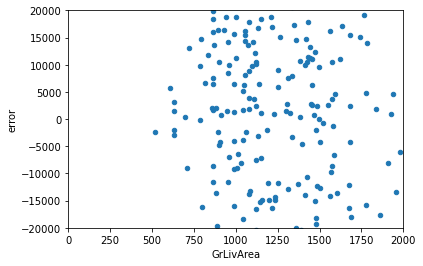

In [15]:
col = 'GrLivArea'
linreg = LinearRegression()
linreg.fit(X_train[col].to_frame(), y_train)
pred = linreg.predict(X_train[col].to_frame())
print('Train: Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))
pred = linreg.predict(X_test[col].to_frame())
print('Test: Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
X_test['error'] = X_test.SalePrice - pred
print('Error Stats')
print(X_test['error'].describe())
X_test.plot.scatter(x=col, y='error',xlim=(0, 2000), ylim=(-20000, 20000))

Conclusion: GrLivArea is not linearly related to 'SalePrice'

# 'WoodDeckSF'

Train: Linear Regression mse: 5543411222.505992
Test: Linear Regression mse: 5901091788.125448
Error Stats
count       438.000000
mean       1488.878480
std       76891.960561
min     -138437.194404
25%      -45903.032561
50%      -16564.068794
75%       31620.655162
max      550418.334283
Name: error, dtype: float64


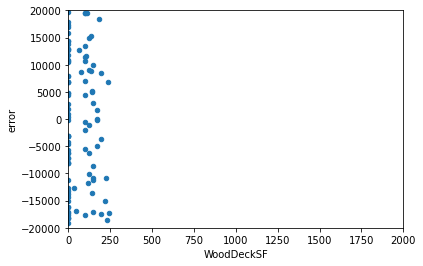

In [16]:
col = 'WoodDeckSF'
linreg = LinearRegression()
linreg.fit(X_train[col].to_frame(), y_train)
pred = linreg.predict(X_train[col].to_frame())
print('Train: Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))
pred = linreg.predict(X_test[col].to_frame())
print('Test: Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
X_test['error'] = X_test.SalePrice - pred
print('Error Stats')
print(X_test['error'].describe())
X_test.plot.scatter(x=col, y='error',xlim=(0, 2000), ylim=(-20000, 20000))

Conclusion: GrLivArea is not linearly related to 'SalePrice'

# 'BsmtUnfSF'

Train: Linear Regression mse: 5851017010.304852
Test: Linear Regression mse: 6406397443.391432
Error Stats
count       438.000000
mean        964.944776
std       80125.677174
min     -132714.157632
25%      -48556.652109
50%      -14962.528470
75%       24028.241926
max      574106.030334
Name: error, dtype: float64


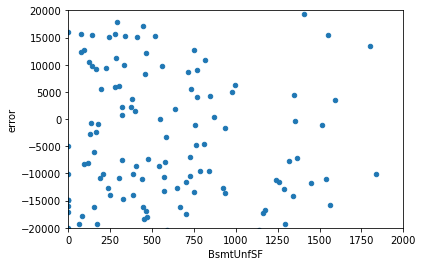

In [17]:
col = 'BsmtUnfSF'
linreg = LinearRegression()
linreg.fit(X_train[col].to_frame(), y_train)
pred = linreg.predict(X_train[col].to_frame())
print('Train: Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))
pred = linreg.predict(X_test[col].to_frame())
print('Test: Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
X_test['error'] = X_test.SalePrice - pred
print('Error Stats')
print(X_test['error'].describe())
X_test.plot.scatter(x=col, y='error',xlim=(0, 2000), ylim=(-20000, 20000))

Conclusion: GrLivArea is not linearly related to 'SalePrice'

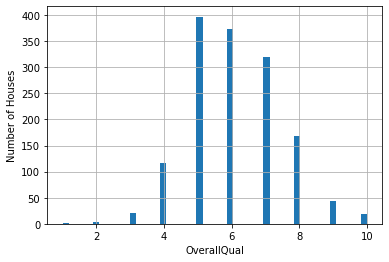

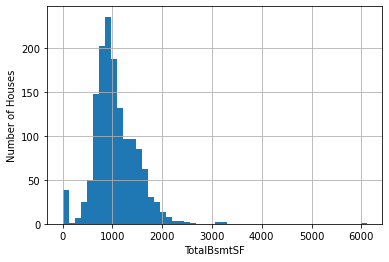

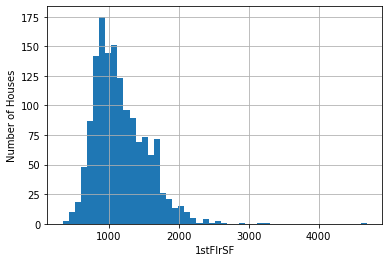

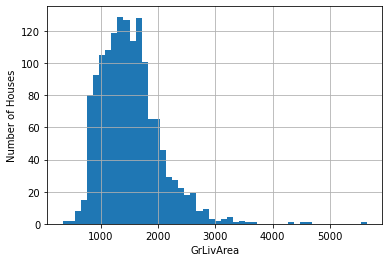

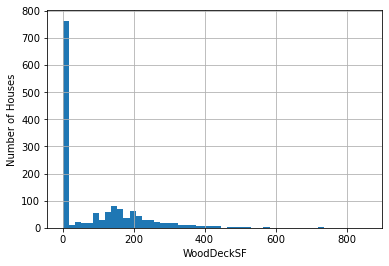

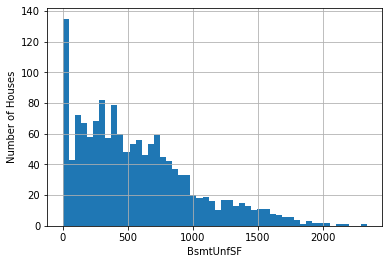

In [18]:
for var in cols[:-1]:
    fig = data[var].hist(bins=50)
    fig.set_xlabel(var)
    fig.set_ylabel('Number of Houses')
    plt.show()

Conclusion: Distribution is not completely Gaussian, and the relationship not completely linear, 

# Performance Comparision

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train[linear_vars+non_linear_vars])
X_test = scaler.transform(X_test[linear_vars+non_linear_vars])

In [20]:
for i in range(len(linear_vars)):
    print('variable: ', linear_vars[i])
    linreg = LinearRegression()
    linreg.fit(pd.Series(X_train[:,i]).to_frame(), y_train)
    print('Test set')
    pred = linreg.predict(pd.Series(X_test[:,i]).to_frame())
    print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
    print()

    rf = RandomForestRegressor(n_estimators=5, random_state=39, max_depth=2,min_samples_leaf=100)
    rf.fit(pd.Series(X_train[:,i]).to_frame(), y_train)
    print('Test set')
    pred = rf.predict(pd.Series(X_test[:,i]).to_frame())
    print('Random Forests mse: {}'.format(mean_squared_error(y_test, pred)))
    print()

variable:  OverallQual
Test set
Linear Regression mse: 2390257968.965773

Test set
Random Forests mse: 3103233518.4366794

variable:  TotalBsmtSF
Test set
Linear Regression mse: 4478167557.081897

Test set
Random Forests mse: 3977464855.683042

variable:  1stFlrSF
Test set
Linear Regression mse: 4380212049.556351

Test set
Random Forests mse: 4308458134.186173

variable:  GrLivArea
Test set
Linear Regression mse: 3728458191.9501696

Test set
Random Forests mse: 3922595724.42011



In [21]:
for i in [4,5]:
    print('variable: ', non_linear_vars[i-4])
    linreg = LinearRegression()
    linreg.fit(pd.Series(X_train[:,i]).to_frame(), y_train)
    print('Test set')
    pred = linreg.predict(pd.Series(X_test[:,i]).to_frame())
    print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
    print()


    rf = RandomForestRegressor(n_estimators=5, random_state=39, max_depth=2,min_samples_leaf=100)
    rf.fit(pd.Series(X_train[:,i]).to_frame(), y_train)
    print('Test set')
    pred = rf.predict(pd.Series(X_test[:,i]).to_frame())
    print('Random Forests mse: {}'.format(mean_squared_error(y_test, pred)))
    print()
    

variable:  WoodDeckSF
Test set
Linear Regression mse: 5901091788.125448

Test set
Random Forests mse: 5892571732.6786375

variable:  BsmtUnfSF
Test set
Linear Regression mse: 6406397443.391433

Test set
Random Forests mse: 6605256151.583271



In [22]:
linreg = LinearRegression()
linreg.fit(X_train[:,0:3], y_train)
print('Test set')
pred = linreg.predict(X_test[:,0:3])
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
print()

rf = RandomForestRegressor(n_estimators=5, random_state=39, max_depth=2,min_samples_leaf=100)
rf.fit(X_train[:,0:3], y_train)
print('Test set')
pred = rf.predict(X_test[:,0:3])
print('Random Forests mse: {}'.format(mean_squared_error(y_test, pred)))
print()


Test set
Linear Regression mse: 2253814462.347893

Test set
Random Forests mse: 2654038031.5467834



In [23]:
linreg = LinearRegression()
linreg.fit(X_train[:,4:5], y_train)
print('Test set')
pred = linreg.predict(X_test[:,4:5])
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
print()


rf = RandomForestRegressor(n_estimators=5, random_state=39, max_depth=2,min_samples_leaf=100)
rf.fit(X_train[:,4:5], y_train)
print('Test set')
pred = rf.predict(X_test[:,4:5])
print('Random Forests mse: {}'.format(mean_squared_error(y_test, pred)))
print()
print()

Test set
Linear Regression mse: 5901091788.125448

Test set
Random Forests mse: 5892571732.6786375


